In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
import pickle
from pathlib import Path
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
data=pd.read_csv('telecom_churn.csv')

In [2]:
ddata=data.drop(columns =['phone number'])
ddata

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
churn_encoded = le.fit_transform(ddata['churn'])
internationalplan_encoded = le.fit_transform(ddata['international plan'])
voicemailplan_encoded = le.fit_transform(ddata['voice mail plan'])
state_encoded = le.fit_transform(ddata['state'])
ddata['en_churn'] = churn_encoded
ddata['en_internationalplan'] = internationalplan_encoded
ddata['en_voicemailplan'] = voicemailplan_encoded
ddata['en_state'] = state_encoded
ddata
f=ddata.drop(columns =['international plan','voice mail plan','churn','state'])
f

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,en_churn,en_internationalplan,en_voicemailplan,en_state
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1,16
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1,35
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,31
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0,35
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0,1,3
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0,0,49
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0,0,39
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,1,0,6


In [4]:
X = f.drop('en_churn', axis = 1)
y = f['en_churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
print('The number of rows and columns of x_train is: ', x_train.shape, ', while the number of rows and columns of y_train is:', y_train.shape)
print('\nChurn percentage in training data is:')
print(y_train.value_counts(normalize=True))
print('\nThe number of rows and columns of x_test is:', x_test.shape,', while the number of rows and columns of y_test is:', y_test.shape)
print('\nChurn percentage in Testing data is:')
print(y_test.value_counts(normalize=True))

The number of rows and columns of x_train is:  (2333, 19) , while the number of rows and columns of y_train is: (2333,)

Churn percentage in training data is:
0    0.854265
1    0.145735
Name: en_churn, dtype: float64

The number of rows and columns of x_test is: (1000, 19) , while the number of rows and columns of y_test is: (1000,)

Churn percentage in Testing data is:
0    0.857
1    0.143
Name: en_churn, dtype: float64


In [6]:
# LOGISTIC REGRESSION
log_model = LogisticRegression().fit(x_train, y_train)

In [7]:
y_train_pred = log_model.predict(x_train)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1993
           1       0.53      0.07      0.12       340

    accuracy                           0.86      2333
   macro avg       0.70      0.53      0.52      2333
weighted avg       0.81      0.86      0.81      2333



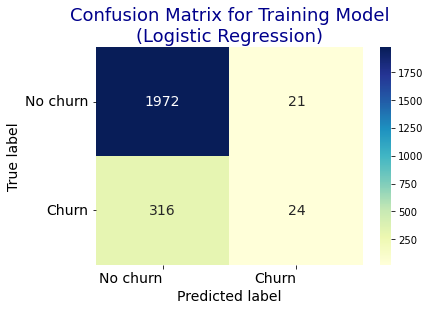

In [8]:
Logreg=classification_report(y_train, y_train_pred)
print(Logreg)
lr =metrics.accuracy_score(y_train, y_train_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       857
           1       0.50      0.05      0.09       143

    accuracy                           0.86      1000
   macro avg       0.68      0.52      0.51      1000
weighted avg       0.81      0.86      0.80      1000



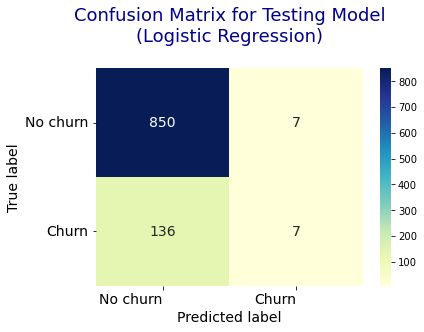

In [9]:
y_test_pred = log_model.predict(x_test)
print(classification_report(y_test, y_test_pred))
lrtest =metrics.accuracy_score(y_test, y_test_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1993
           1       0.99      0.81      0.89       340

    accuracy                           0.97      2333
   macro avg       0.98      0.91      0.94      2333
weighted avg       0.97      0.97      0.97      2333



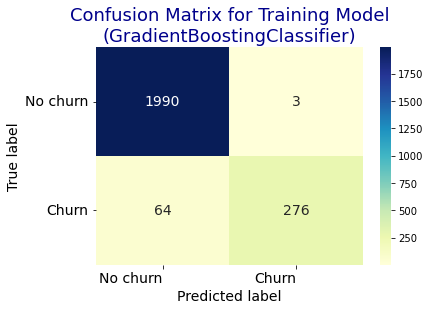

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       857
           1       0.94      0.68      0.79       143

    accuracy                           0.95      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.95      0.95      0.94      1000



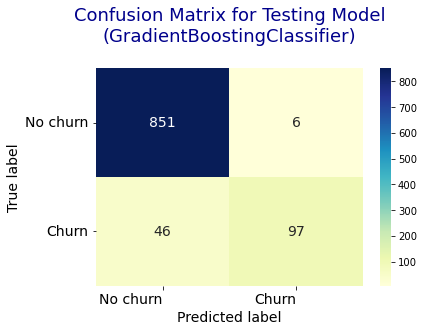

In [10]:
# GradientBoostingClassifier

log_model = GradientBoostingClassifier().fit(x_train, y_train)
y_train_pred = log_model.predict(x_train)

#TRAIN
gradient=classification_report(y_train, y_train_pred)
print(gradient)
tt =metrics.accuracy_score(y_train, y_train_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(GradientBoostingClassifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#TEST
y_test_pred = log_model.predict(x_test)
print(classification_report(y_test, y_test_pred))
tttest =metrics.accuracy_score(y_test, y_test_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(GradientBoostingClassifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      1.00      1.00       340

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333



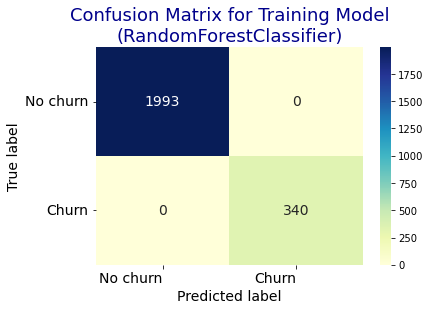

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       857
           1       0.95      0.68      0.79       143

    accuracy                           0.95      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.95      0.95      0.95      1000



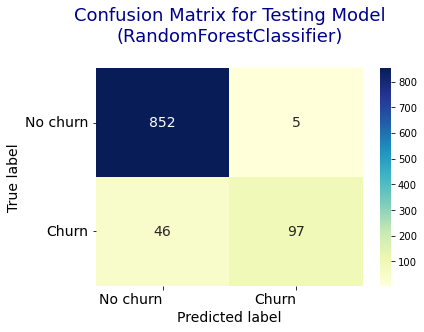

In [11]:
#RandomForestClassifier()

log_model = RandomForestClassifier().fit(x_train, y_train)
y_train_pred = log_model.predict(x_train)

#TRAIN
random=classification_report(y_train, y_train_pred)
print(random)
rr =metrics.accuracy_score(y_train, y_train_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(RandomForestClassifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#TEST
y_test_pred = log_model.predict(x_test)
print(classification_report(y_test, y_test_pred))
rrtest =metrics.accuracy_score(y_test, y_test_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(RandomForestClassifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      1.00      1.00       340

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333



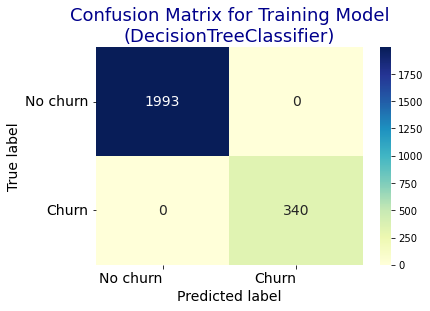

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       857
           1       0.65      0.71      0.68       143

    accuracy                           0.90      1000
   macro avg       0.80      0.82      0.81      1000
weighted avg       0.91      0.90      0.91      1000



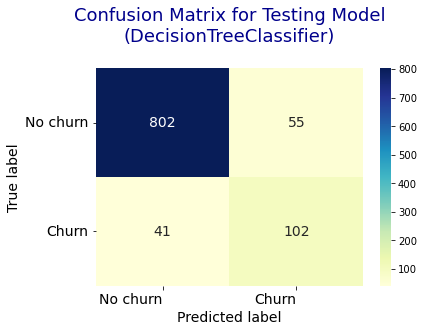

In [12]:
# DecisionTreeClassifier

log_model = DecisionTreeClassifier().fit(x_train, y_train)
y_train_pred = log_model.predict(x_train)

#TRAIN
decision=classification_report(y_train, y_train_pred)
print(decision)
dd =metrics.accuracy_score(y_train, y_train_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(DecisionTreeClassifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#TEST
y_test_pred = log_model.predict(x_test)
print(classification_report(y_test, y_test_pred))
ddtest =metrics.accuracy_score(y_test, y_test_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(DecisionTreeClassifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1993
           1       0.92      0.24      0.38       340

    accuracy                           0.89      2333
   macro avg       0.90      0.62      0.66      2333
weighted avg       0.89      0.89      0.86      2333



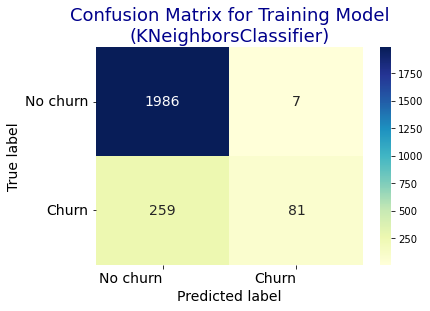

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       857
           1       0.81      0.18      0.30       143

    accuracy                           0.88      1000
   macro avg       0.85      0.59      0.61      1000
weighted avg       0.87      0.88      0.84      1000



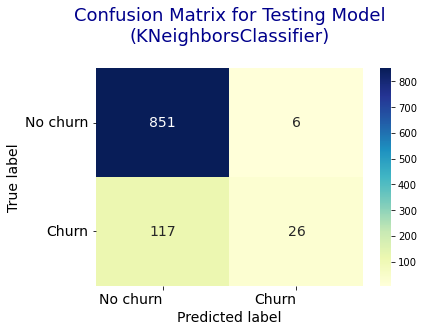

In [13]:
# KNeighborsClassifier

log_model = KNeighborsClassifier(n_neighbors = 4).fit(x_train, y_train)
y_train_pred = log_model.predict(x_train)

#TRAIN
kneighbor=classification_report(y_train, y_train_pred)
print(kneighbor)
kk =metrics.accuracy_score(y_train, y_train_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(KNeighborsClassifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#TEST
y_test_pred = log_model.predict(x_test)
print(classification_report(y_test, y_test_pred))
kktest =metrics.accuracy_score(y_test, y_test_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(KNeighborsClassifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1993
           1       0.00      0.00      0.00       340

    accuracy                           0.85      2333
   macro avg       0.43      0.50      0.46      2333
weighted avg       0.73      0.85      0.79      2333



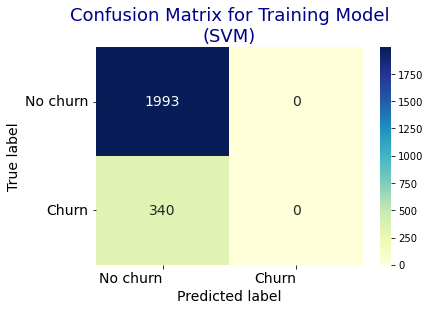

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       857
           1       0.00      0.00      0.00       143

    accuracy                           0.86      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.73      0.86      0.79      1000



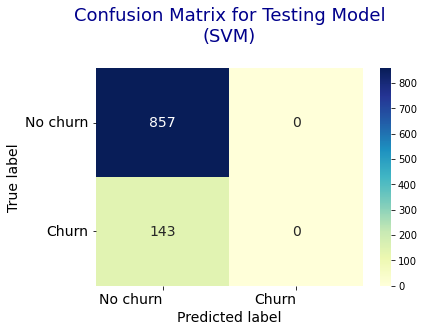

In [14]:
#  SVM(Support vector classifier)
log_model = SVC(kernel='rbf',random_state=0).fit(x_train, y_train)
y_train_pred = log_model.predict(x_train)

#TRAIN
svm=classification_report(y_train, y_train_pred)
print(svm)
ss =metrics.accuracy_score(y_train, y_train_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(SVM)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#TEST
y_test_pred = log_model.predict(x_test)
print(classification_report(y_test, y_test_pred))
sstest =metrics.accuracy_score(y_test, y_test_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(SVM)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()


[LightGBM] [Warning] lambda_l1 is set=8.142384644362947e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.142384644362947e-06
[LightGBM] [Warning] bagging_fraction is set=0.7323707200247135, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7323707200247135
[LightGBM] [Warning] feature_fraction is set=0.5164384666114301, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5164384666114301
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=3.432798202818561e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.432798202818561e-08
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      1.00      1.00       340

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1

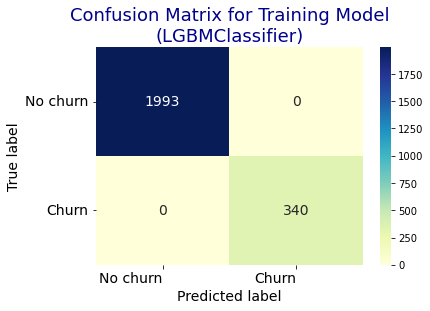

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       857
           1       0.95      0.68      0.79       143

    accuracy                           0.95      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.95      0.95      0.95      1000



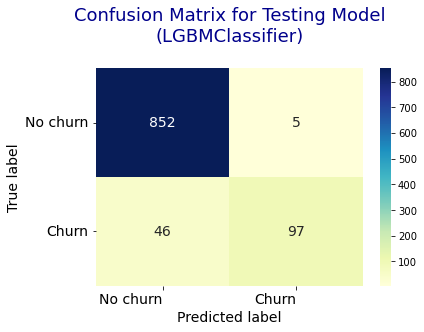

In [15]:
# LGBMClassifier
log_model = LGBMClassifier(random_state=0,scale_pos_weight=5,
num_leaves=724,
max_depth=9,
lambda_l1=8.142384644362947e-06,
lambda_l2=3.432798202818561e-08,
feature_fraction=0.5164384666114301,
bagging_fraction=0.7323707200247135,
bagging_freq=5,
min_child_samples=5).fit(x_train, y_train)
y_train_pred = log_model.predict(x_train)

#TRAIN
lgbm=classification_report(y_train, y_train_pred)
print(lgbm)
ll =metrics.accuracy_score(y_train, y_train_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(LGBMClassifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#TEST
y_test_pred = log_model.predict(x_test)
print(classification_report(y_test, y_test_pred))
lltest =metrics.accuracy_score(y_test, y_test_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(LGBMClassifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       0.98      0.99      0.99       340

    accuracy                           1.00      2333
   macro avg       0.99      1.00      0.99      2333
weighted avg       1.00      1.00      1.00      2333



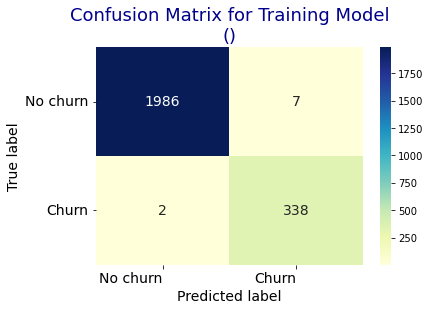

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       857
           1       0.88      0.85      0.87       143

    accuracy                           0.96      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.96      0.96      0.96      1000



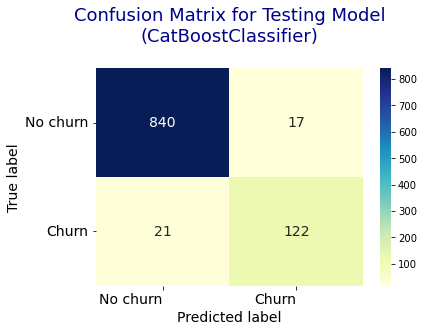

In [16]:
# CatBoostClassifier
log_model = CatBoostClassifier(verbose = False,random_state=0,scale_pos_weight=5).fit(x_train, y_train)
y_train_pred = log_model.predict(x_train)

#TRAIN
catboost=classification_report(y_train, y_train_pred)
print(catboost)
cc =metrics.accuracy_score(y_train, y_train_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n()', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#TEST
y_test_pred = log_model.predict(x_test)
print(classification_report(y_test, y_test_pred))
cctest =metrics.accuracy_score(y_test, y_test_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(CatBoostClassifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

[07:12:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      1.00      1.00       340

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333



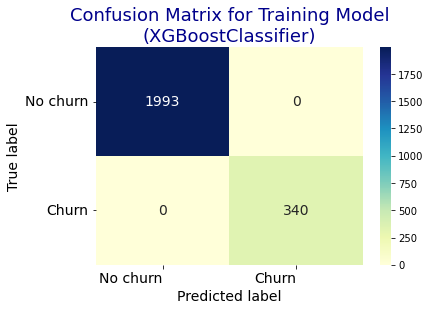

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       857
           1       0.92      0.79      0.85       143

    accuracy                           0.96      1000
   macro avg       0.94      0.89      0.91      1000
weighted avg       0.96      0.96      0.96      1000



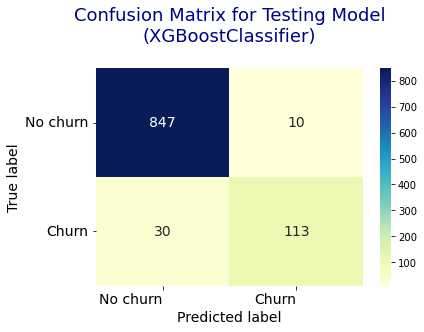

In [23]:
# XGBClassifier

log_model = XGBClassifier(random_state=0,scale_pos_weight=5).fit(x_train, y_train)
y_train_pred = log_model.predict(x_train)

#TRAIN
xgboost=classification_report(y_train, y_train_pred)
print(xgboost)
xg =metrics.accuracy_score(y_train, y_train_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(XGBoostClassifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#TEST
y_test_pred = log_model.predict(x_test)
print(classification_report(y_test, y_test_pred))
xgtest =metrics.accuracy_score(y_test, y_test_pred)
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(XGBoostClassifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [25]:
modelstrain = pd.DataFrame({'name_model':["Logistic Regression","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","SVM","LGBMClassifier","CatBoostClassifier",'XGBoostclassifier'],\
                        'accuracy_percentage':[lr,tt,rr,dd,kk,ss,ll,cc,xg]})
modelstrain


,name_model,accuracy_percentage
0,Logistic Regression,0.855551
1,GradientBoostingClassifier,0.971282
2,RandomForestClassifier,1.000000
3,DecisionTreeClassifier,1.000000
4,KNeighborsClassifier,0.885984
5,SVM,0.854265
6,LGBMClassifier,1.000000
7,CatBoostClassifier,1.000000
8,XGBoostclassifier,1.000000


In [26]:
modelstest = pd.DataFrame({'name_model':["Logistic Regression","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","SVM","LGBMClassifier","CatBoostClassifier",'XGBoostclassifier'],\
                        'accuracy_percentage':[lrtest,tttest,rrtest,ddtest,kktest,sstest,lltest,cctest,xgtest]})
modelstest


,name_model,accuracy_percentage
0,Logistic Regression,0.857
1,GradientBoostingClassifier,0.948
2,RandomForestClassifier,0.949
3,DecisionTreeClassifier,0.904
4,KNeighborsClassifier,0.877
5,SVM,0.857
6,LGBMClassifier,0.949
7,CatBoostClassifier,0.960
8,XGBoostclassifier,0.960
